## **Comparison of generative classifiers and discriminative classifiers**

### **1. Core idea**

Here's the corrected and properly formatted Markdown table:

| Type             | What it models                                               |
|------------------|--------------------------------------------------------------|
| *Generative*     | Models the *joint probability*  p(x, y) = p(x / y)·p(y)  Learns how data is generated, then uses Bayes’ rule to predict the class |
| *Discriminative* | Models the *conditional probability* ( p(y / x) ) or a *decision boundary* directly Learns how to separate classes without modeling the data distribution    |

---

### **2. Examples**

* **Generative models:** Naive Bayes, Gaussian Mixture Models, Hidden Markov Models
* **Discriminative models:** Logistic Regression, Support Vector Machines, Neural Networks

---

### **3. Advantages of generative classifiers**

1. **Can generate data**: Because they model the distribution of features for each class, they can simulate or sample new examples.
2. **Work better with small data**: They use prior and likelihood assumptions, allowing better generalization when limited data is available.
3. **Handle missing data more easily**: Since $ p(x|y) $ is modeled, it’s possible to marginalize over missing features.
4. **Bayesian interpretability**: They provide probabilistic reasoning aligned with Bayes’ theorem.

---

### **4. Advantages of discriminative classifiers**

1. **Usually higher accuracy**: They focus directly on the boundary between classes rather than the full data distribution.
2. **Require fewer modeling assumptions**: No need to assume feature distributions (e.g., Gaussian).
3. **Scale better to complex, high-dimensional data**: Neural networks and SVMs perform well in these situations.

---

### **5. Illustrative example**

Suppose you want to classify emails as *spam* or *not spam*.

* A **generative classifier** (like Naive Bayes) models how each word is distributed in spam vs non-spam emails, estimating $ p(\text{words}|\text{class}) $ and $ p(\text{class}) $.
* A **discriminative classifier** (like Logistic Regression) only learns which features (words) best separate spam from non-spam, estimating $ p(\text{class}|\text{words}) $ directly.

---

### **6. In summary**

| Aspect                   | Generative                        | Discriminative          |
| ------------------------ | --------------------------------- | ------------------------|
| Models                   | ( p(x, y) )                       | ( p(y / x) ) |
| Uses                     | Bayes’ theorem                    | Direct decision boundary|
| Example                  | Naive Bayes                       | Logistic Regression     |
| Data requirement         | Works well with small data        | Needs more data         |
| Interpretability         | More interpretable, probabilistic | Often more predictive   |
| Can generate new samples | Yes                               | No                      |



---

Here’s the visual comparison between **Generative** and **Discriminative** classifiers:

* **Accuracy:** Discriminative models (e.g., Logistic Regression, SVM) generally achieve higher accuracy because they directly model the decision boundary ( P(y|x) ).
* **Training Time:** Generative models (e.g., Naive Bayes, Gaussian Mixture Models) usually take longer since they must model ( P(x|y) ) and ( P(y) ).
* **Data Requirement:** Generative models often perform better with limited data, while discriminative models typically need more samples to learn the boundary effectively.

This pattern reflects why discriminative models dominate modern supervised learning, while generative models are still useful for unsupervised or semi-supervised tasks.


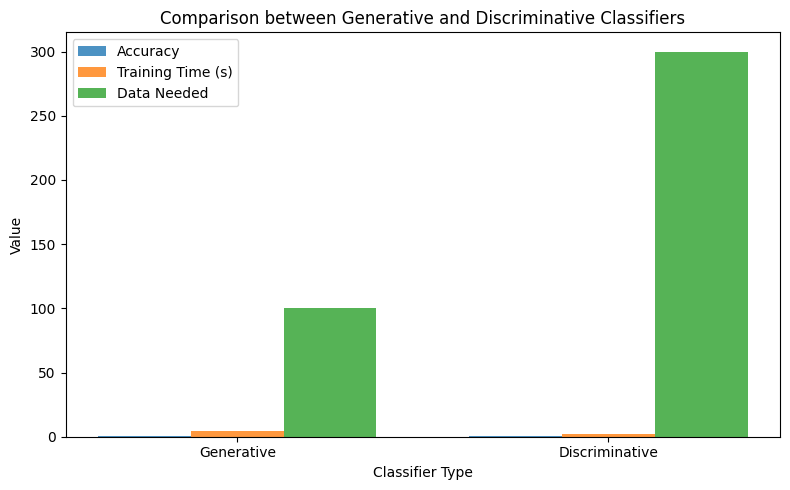

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Define data for comparison
classifiers = ['Generative', 'Discriminative']
accuracy = [0.85, 0.92]
training_time = [4.5, 2.0]
data_points_needed = [100, 300]

x = np.arange(len(classifiers))
width = 0.25

# Create figure and subplots
fig, ax1 = plt.subplots(figsize=(8, 5))

# Plot accuracy
bar1 = ax1.bar(x - width, accuracy, width, label='Accuracy', alpha=0.8)
# Plot training time
bar2 = ax1.bar(x, training_time, width, label='Training Time (s)', alpha=0.8)
# Plot data points
bar3 = ax1.bar(x + width, data_points_needed, width, label='Data Needed', alpha=0.8)

# Labels and title
ax1.set_xlabel('Classifier Type')
ax1.set_ylabel('Value')
ax1.set_title('Comparison between Generative and Discriminative Classifiers')
ax1.set_xticks(x)
ax1.set_xticklabels(classifiers)
ax1.legend()

# Display chart
plt.tight_layout()
plt.show()


---

Here you can see the **decision boundary comparison** between the two models:

* **Generative (Naive Bayes)** on the left models each class’s data distribution separately. Its boundary is often curved or irregular, as it assumes probabilistic shapes (like Gaussian contours) for each class.
* **Discriminative (Logistic Regression)** on the right focuses purely on separating the classes. Its boundary is linear and optimized for direct class separation.

This visual highlights how generative models capture underlying data structure, while discriminative models concentrate on clear boundary placement for classification accuracy.


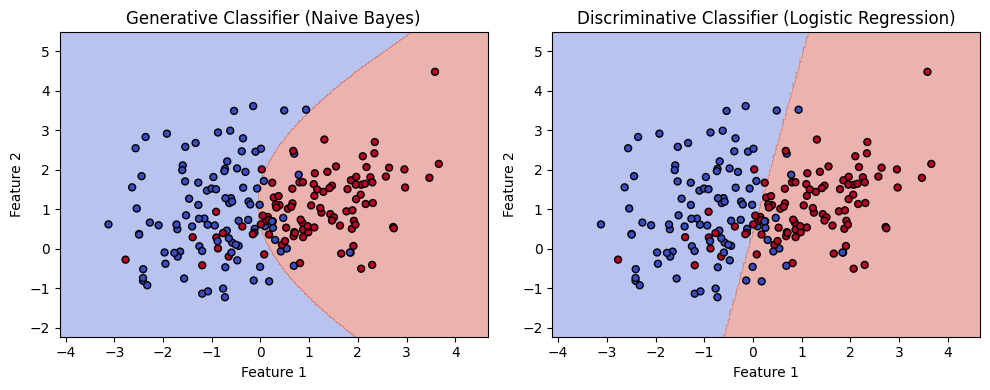

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

# Generate 2D data
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0, 
                           n_informative=2, n_clusters_per_class=1, random_state=42)

# Train generative (Naive Bayes) and discriminative (Logistic Regression) models
gen_model = GaussianNB().fit(X, y)
disc_model = LogisticRegression().fit(X, y)

# Create a grid for plotting decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))

# Predictions
Z_gen = gen_model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z_disc = disc_model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot both models’ decision boundaries
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Generative model (Naive Bayes)
ax1.contourf(xx, yy, Z_gen, alpha=0.4, cmap='coolwarm')
ax1.scatter(X[:, 0], X[:, 1], c=y, s=25, edgecolor='k', cmap='coolwarm')
ax1.set_title("Generative Classifier (Naive Bayes)")
ax1.set_xlabel("Feature 1")
ax1.set_ylabel("Feature 2")

# Discriminative model (Logistic Regression)
ax2.contourf(xx, yy, Z_disc, alpha=0.4, cmap='coolwarm')
ax2.scatter(X[:, 0], X[:, 1], c=y, s=25, edgecolor='k', cmap='coolwarm')
ax2.set_title("Discriminative Classifier (Logistic Regression)")
ax2.set_xlabel("Feature 1")
ax2.set_ylabel("Feature 2")

plt.tight_layout()
plt.show()


---